In [153]:
"""
This is SciPy's kd-tree implementation that we used just to see how well can KD-trees perform
Since it becomes kNN for small datasets, we see that the accuracy for it is the same as kNN.
Our custom implementation performs slightly less better at 89% accuracy.
"""

import numpy as np
import pandas as pd
from sklearn.neighbors import KDTree
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from time import time

In [154]:
#Import data file
df = pd.read_csv('Final Data');
y = df['Power Outage'];
df = df.drop(['Power Outage'], axis=1);
x = df[['Avg Wind Speed Squared','2 min wind speed squared','5 second wind speed squared','Fog/Ice','Heavy/Freezing Fog','Thunder']];
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 23);
x_train.head();

In [155]:
#Benchmark against kNN
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='brute').fit(x_train);

In [156]:
#Calculate how often do KD-trees give identical results to kNN for the nearest neighbor search
#The SciPy version gives the right neighb
count = 0
tree = KDTree(x_train,leaf_size=3);
for data in x_test.values:
    dist, ind1 = nbrs.kneighbors(data.reshape(1, -1));
    dist, ind2 = tree.query(data.reshape(1,-1), k=3);
    sum=0;
    for i in range (0, len(ind[0,:])):
        sum=sum+ind1[0,:][i]-ind2[0,:][i];
    if(sum!=0):
        print(ind1, ind2);
        count=count+1;
        
total_count = x_test.shape[0];
count = 100*(count/total_count);
print("KDTrees misclassified these many points:", count);

KDTrees misclassified these many points: 0.0


In [157]:
#Find the label predicted by the KD-tree classifier
tree = KDTree(x_train,leaf_size=3);
pred = np.zeros(x_test.shape[0])
count=0
for data in x_test.values:
    dist, ind = tree.query(data.reshape(1,-1), k=3);
    sum=0;
    for i in range (0, len(ind[0,:])):
        index = ind[0,:][i];
        sum = sum + y_train.iloc[index];
    pred[count] = np.round(sum/3);
    count=count+1;

Accuracy : 0.921875


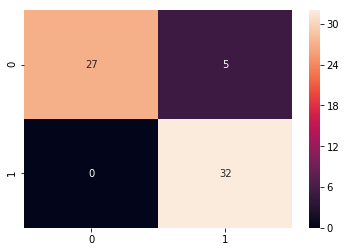

In [158]:
#Calculate accuracy and heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test.values, pred);
cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot=True);
print("Accuracy :", accuracy);
plt.show();

In [159]:
#Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
start = time()
knn = KNeighborsClassifier(n_neighbors=3, weights="distance")
knn.fit(x_train, y_train);
pred = knn.predict(x_test);
print("Time: ", time()-start);
accuracy = accuracy_score(y_test, pred);


Time:  0.002273082733154297


Accuracy:  0.921875


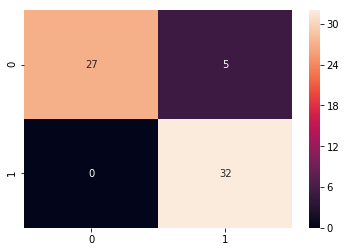

In [160]:
print("Accuracy: ", accuracy);
# from sklearn.metrics import confusion_matrix
# con_mat = confusion_matrix(y_test, pred, [0, 1])
# print(con_mat)
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot=True);

plt.show();